In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def draw_sentiments_cdf(polarities,key):
    i = 0
    list = []
    for pol in polarities:
        list.append(pol[key])

    print("Drawing cdf for ", len(list), " sentiments..")

    list[:] = [float(x) for x in list]
    sortedlist = np.sort(list)
    p = 1. * np.arange(len(sortedlist)) / (len(sortedlist) - 1)
    plt.plot(sortedlist, p, 'r-')
    plt.xlim([0.00,1.00])
    plt.ylim([0.00,1.00])
    plt.xlabel('%s Sentiment' % key)
    plt.title('CDF')
    plt.show()
    print("Done...")

In [4]:
#read files 
data_1 = pd.read_csv('data/arabic/data_1.csv')
data_2 = pd.read_csv('data/arabic/data_2.csv')
data_3 = pd.read_csv('data/arabic/data_3.csv')
data_4 = pd.read_csv('data/arabic/data_4.csv')

In [5]:
combined = pd.concat([data_1,data_2,data_3,data_4])

In [6]:
combined.head()

,Unnamed: 0,rating,Arabic review,no,English review
0,0.0,5.0,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,0.0,A wonderful book. I think that the whole novel...
1,1.0,4.0,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,1.0,"Novel touches the soul Bamgaha, proud that I f..."
2,2.0,5.0,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,2.0,A novel court every shortcut. It was my favori...
3,3.0,3.0,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,3.0,"This book is sad bitter, injustice and persecu..."
4,4.0,4.0,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,4.0,Novel and represent a realistic and fantastic ...


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
sentences = combined['English review']
analyzer = SentimentIntensityAnalyzer()
arabic_polarities = []
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    arabic_polarities.append(vs)

KeyboardInterrupt: 

In [12]:
english_polarities = []
english_data = next(pd.read_json('data/english/english_reviews.json',lines=True,chunksize=80000))
english_sents = english_data['review_text']

ValueError: Expected object or value

In [ ]:
english_sents.to_csv

In [189]:
english_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,16,0
1,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
2,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
3,8842281e1d1347389f2ab93d60773d4d,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,Sun Jul 30 15:42:05 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,22,4
4,8842281e1d1347389f2ab93d60773d4d,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,Sat Aug 05 00:00:00 -0700 2017,Sun Jul 30 00:00:00 -0700 2017,8,0


In [9]:
arabic_polarities[0]

{'neg': 0.124, 'neu': 0.517, 'pos': 0.358, 'compound': 0.6529}

In [10]:
for sentence in english_sents:
    vs = analyzer.polarity_scores(sentence)
    english_polarities.append(vs)

Drawing cdf for  80003  sentiments..


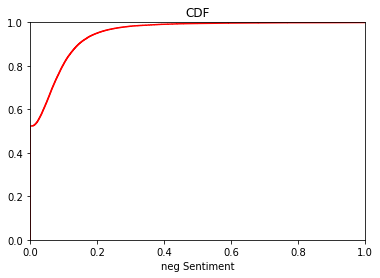

Done...
Drawing cdf for  80003  sentiments..


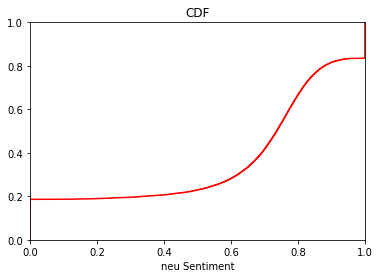

Done...
Drawing cdf for  80003  sentiments..


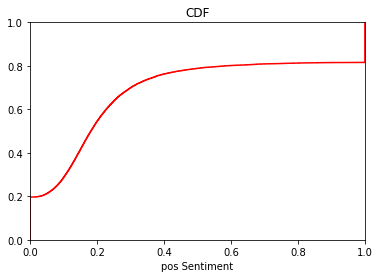

Done...
Drawing cdf for  80003  sentiments..


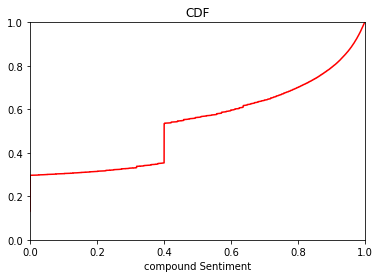

Done...


In [23]:
#draw arabic polaritites 
draw_sentiments_cdf(arabic_polarities,'neg')
draw_sentiments_cdf(arabic_polarities,'neu')
draw_sentiments_cdf(arabic_polarities,'pos')
draw_sentiments_cdf(arabic_polarities,'compound')

Drawing cdf for  80000  sentiments..


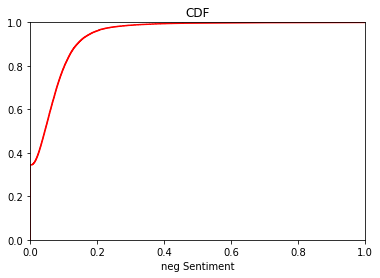

Done...
Drawing cdf for  80000  sentiments..


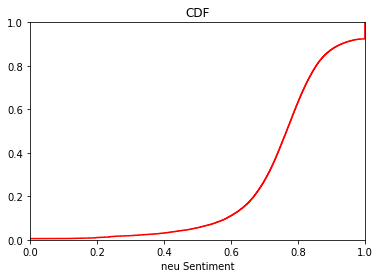

Done...
Drawing cdf for  80000  sentiments..


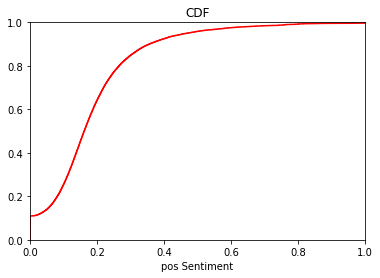

Done...
Drawing cdf for  80000  sentiments..


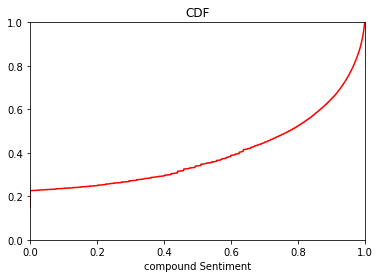

Done...


In [24]:
draw_sentiments_cdf(english_polarities,'neg')
draw_sentiments_cdf(english_polarities,'neu')
draw_sentiments_cdf(english_polarities,'pos')
draw_sentiments_cdf(english_polarities,'compound')

In [34]:
def draw_cdf(key,xlim=[0.00,1.00],ylim=[0.00,1.00]):

    en_pols = []
    ar_pols = []

    for pol in english_polarities:
        en_pols.append(pol[key])

    for pol in arabic_polarities:
        ar_pols.append(pol[key])

    en_list = [float(x) for x in en_pols]
    ar_list = [float(x) for x in ar_pols]

    en_sortedlist = np.sort(en_list)
    ar_sortedlist = np.sort(ar_list)

    en_p = 1. * np.arange(len(en_sortedlist)) / (len(en_sortedlist) - 1)
    ar_p = 1. * np.arange(len(ar_sortedlist)) / (len(ar_sortedlist) - 1)

    plt.plot(en_sortedlist, en_p, 'r-')
    plt.plot(ar_sortedlist, ar_p, 'b-')

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('%s Sentiment' % key)
    plt.title('Book Reviews CDF')
    plt.legend(['en','ar'])
    plt.show()

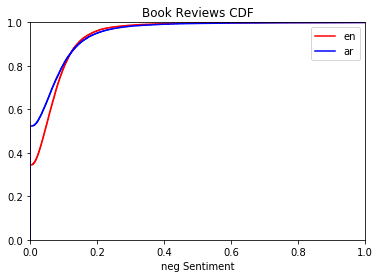

In [35]:
draw_cdf('neg')

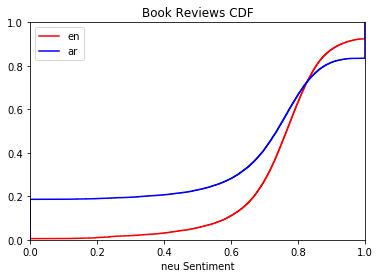

In [36]:
draw_cdf('neu')

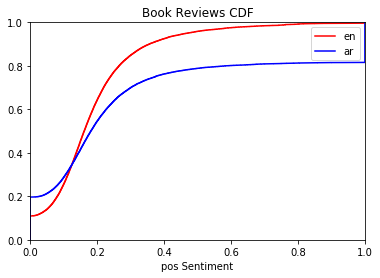

In [37]:
draw_cdf('pos')

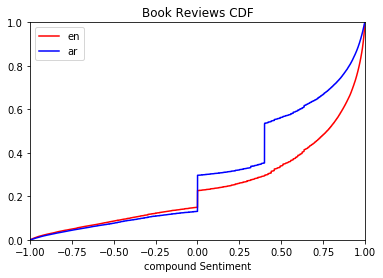

In [40]:
draw_cdf('compound',[-1,1],[0,1])

# Rating CDF 

## Arabic

In [52]:
pos_sents = combined[(combined['rating'] >= 4)]['English review']
neg_sents = combined[(combined['rating'] <= 2)]['English review']
nue_sents = combined[(combined['rating'] == 3)]['English review']

In [55]:
ar_sents = [pos_sents,neg_sents,nue_sents]
ar_pols = []
for sents_categ in ar_sents:
    categ_pols = []
    for sent in sents_categ:
        vs = analyzer.polarity_scores(sent)
        categ_pols.append(vs)
    ar_pols.append(categ_pols)

In [74]:
#rearrange to [neg,neu,pos]
ar_pols_temp = [ar_pols[1],ar_pols[2],ar_pols[0]]
ar_pols = ar_pols_temp

In [128]:
def ps_lists(pols,key):
    
    key_pols = []
    
    for categ in pols:
        categ_pols = []
        for pol in categ:
            categ_pols.append(pol[key])
        key_pols.append(categ_pols)
    

    lists = []
    for k in key_pols:
        klist = [float(x) for x in k]
        lists.append(klist)
    

    sorted_lists = []
    for l in lists:
        key_sortedlist = np.sort(l)
        sorted_lists.append(key_sortedlist)
        

    ps = []
    for sl in sorted_lists:
        kp = 1. * np.arange(len(sl)) / (len(sl) - 1)
        ps.append(kp)
        
    
    return (sorted_lists,ps)

In [186]:
keys = ['compound','neg','neu','pos']
pslists = {}

for k in keys:
    pslists[k] = ps_lists(ar_pols,k)

In [205]:
def draw_cdfs(pslists,title):
    colors = ['-r','-b','-g']
    axx = [221,222,223,224]

    plt.figure(figsize=(16,16))
    plt.suptitle(title,fontsize=32)

    for i in range(4):

        plt.subplot(axx[i])
        plt.xlim([0,1])
        if keys[i] == 'compound':
            plt.xlim([-1,1])
        plt.ylim([0,1])
        plt.xlabel('%s Sentiment' % keys[i])

        for j in range(3):
            plt.plot(pslists[keys[i]][0][j],pslists[keys[i]][1][j],colors[j])
            plt.legend(['1&2 Stars','3 Stars','4&5 Stars'])

    plt.show()

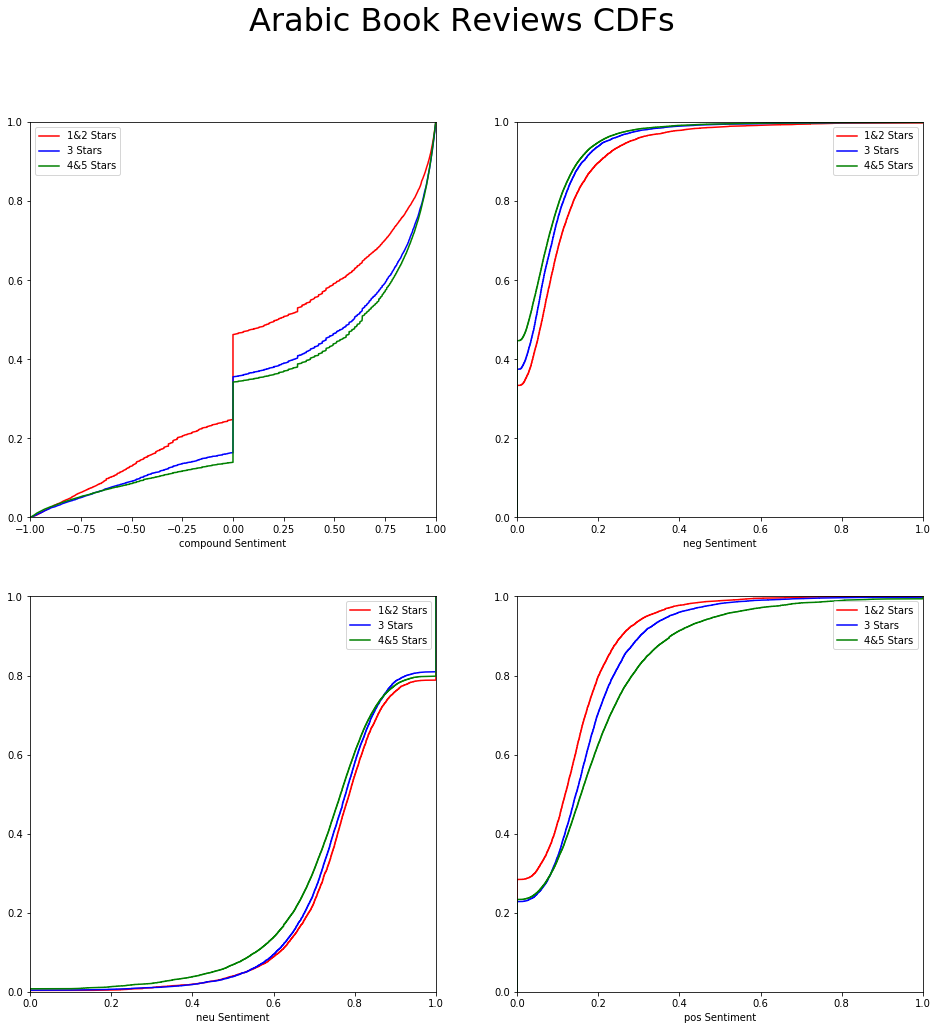

In [201]:
draw_cdfs(pslists,"Arabic Book Reviews CDFs")

## English 

In [191]:
pos_sents_en = english_data[(english_data['rating'] >= 4)]['review_text']
neg_sents_en = english_data[(english_data['rating'] <= 2)]['review_text']
nue_sents_en = english_data[(english_data['rating'] == 3)]['review_text']

In [192]:
en_sents = [neg_sents_en,nue_sents_en,pos_sents_en]
en_pols = []
for sents_categ in en_sents:
    categ_pols = []
    for sent in sents_categ:
        vs = analyzer.polarity_scores(sent)
        categ_pols.append(vs)
    en_pols.append(categ_pols)

In [195]:
en_pslists = {}
for k in keys:
    en_pslists[k] = ps_lists(en_pols,k)

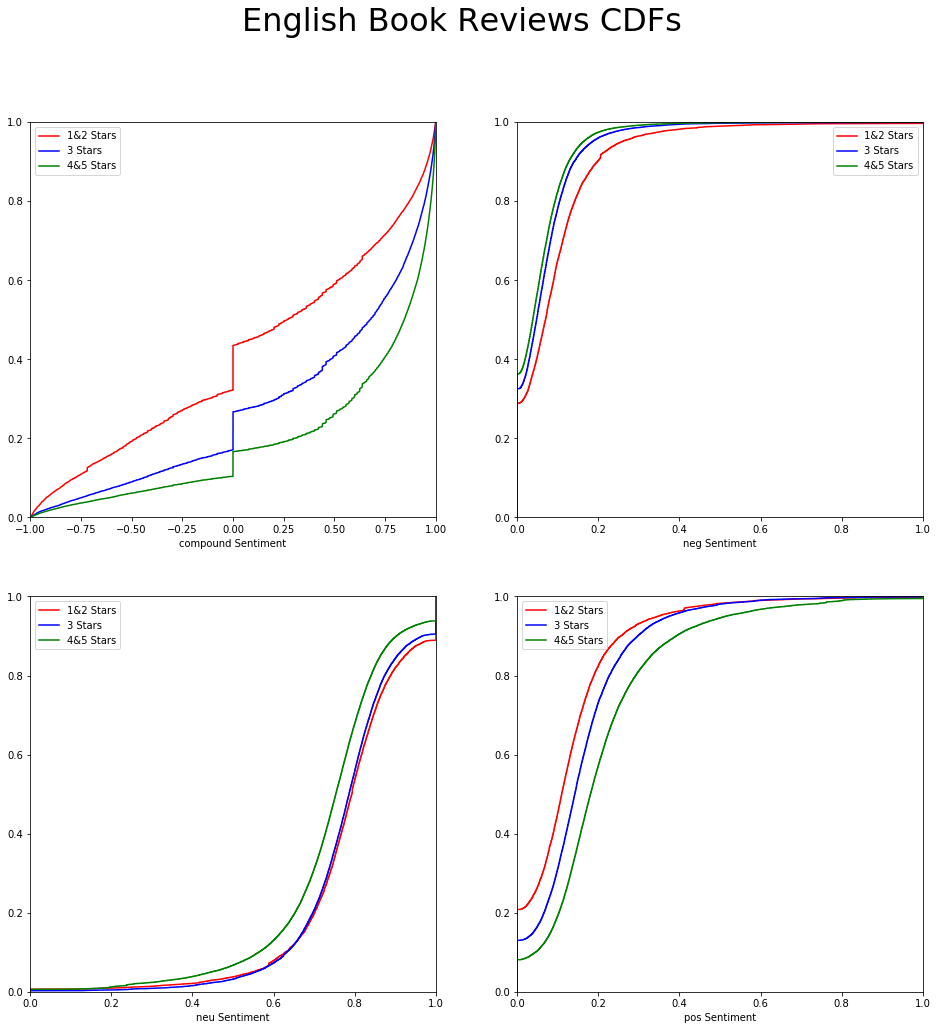

In [202]:
draw_cdfs(en_pslists,"English Book Reviews CDFs")

In [223]:
def draw_cdfs_combined():
    colors = ['-r','-b','-g']
    en_color = ['--r','--b','--g']
    axx = [221,222,223,224]

    plt.figure(figsize=(16,16))
    plt.suptitle("English & Arabic Book Reviews CDFs",fontsize=32)

    for i in range(4):

        plt.subplot(axx[i])
        plt.xlim([0,1])
        if keys[i] == 'compound':
            plt.xlim([-1,1])
        plt.ylim([0,1])
        plt.xlabel('%s Sentiment' % keys[i])

        for j in range(3):
            plt.plot(pslists[keys[i]][0][j],pslists[keys[i]][1][j],colors[j])
            plt.plot(en_pslists[keys[i]][0][j],en_pslists[keys[i]][1][j],en_color[j])
            plt.legend(['1&2 Stars ar','1&2 Stars en', '3 Stars ar','3 Stars en','4&5 Stars ar','4&5 Stars en'])

    plt.show()

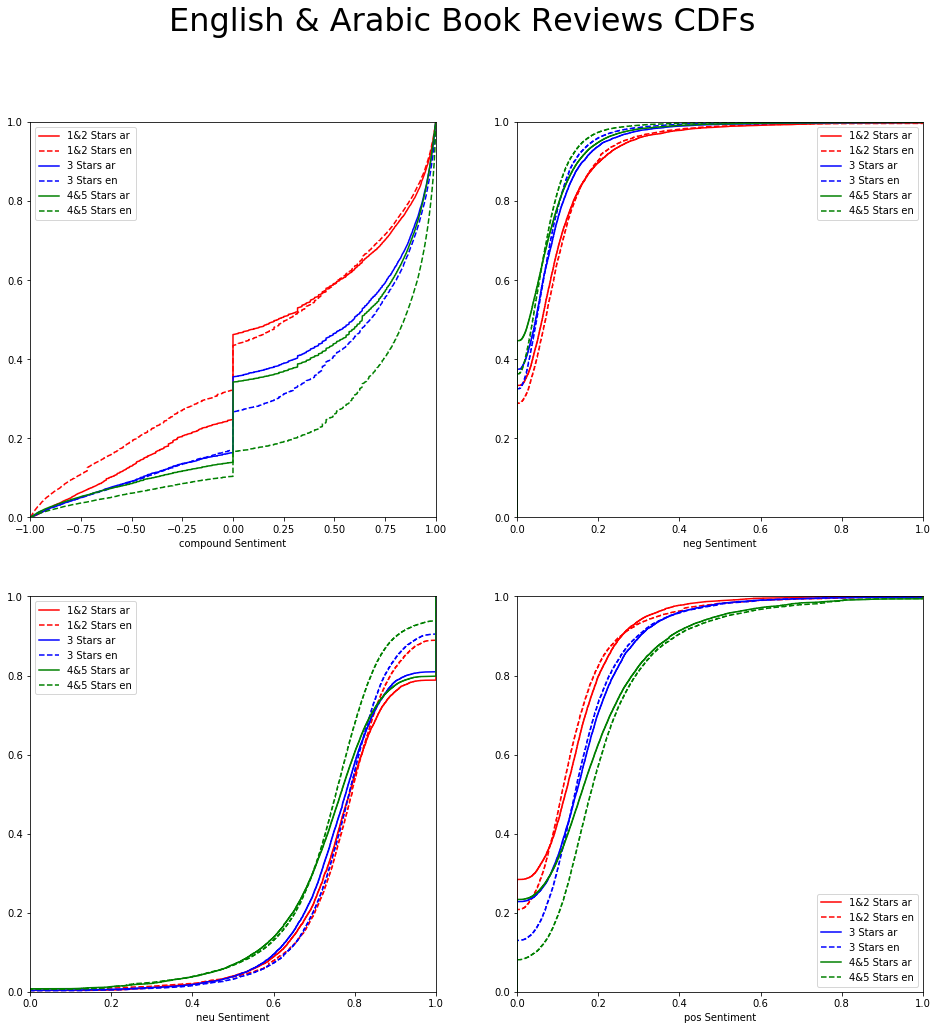

In [224]:
draw_cdfs_combined()